# Example usage of `neuralib.calimg`

- example of **Scanbox** acqusition system and **suite2p** registration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neuralib.calimg.scanbox import SBXInfo
from neuralib.calimg.scanbox.viewer import SBXViewer
from neuralib.calimg.suite2p import *

In [2]:
%load_ext autoreload
%autoreload

### print the Scanbox information as dictionary

In [3]:
file = ...  # scanbox .mat output file
sbx = SBXInfo.load(file)
sbx.print_asdict()

{'abort_bit': 0,
 'area_line': 1,
 'ballmotion': array([], dtype=uint8),
 'bytesPerBuffer': 9504000,
 'calibration': [{'delta': array([ 99.9927, -99.9927]),
                  'gain_resonant_mult': 1,
                  'uv': array([50, 57], dtype=uint8),
                  'x': 1.7542578947368421,
                  'y': -1.999854},
                 {'delta': array([ 99.9927, -99.9927]),
                  'gain_resonant_mult': 1,
                  'uv': array([54, 62], dtype=uint8),
                  'x': 1.6127854838709677,
                  'y': -1.8517166666666667},
                 {'delta': array([ 79.6727, -79.6727]),
                  'gain_resonant_mult': 1,
                  'uv': array([55, 62], dtype=uint8),
                  'x': 1.2850435483870968,
                  'y': -1.4485945454545455},
                 {'delta': array([ 69.5127, -69.5127]),
                  'gain_resonant_mult': 1,
                  'uv': array([55, 62], dtype=uint8),
                  'x': 1.12117258

### View the .sbx file

In [ ]:
directory  = ...  # directory contains the .sbx and .mat output from scanbox
sbx_viewer = SBXViewer(directory)

# play 100 to 200 frames
sbx_viewer.play(slice(100,200), plane=0, channel=0)

# save as tiff sequences
sbx_viewer.to_tiff(slice(100,200), plane=0, channel=0, output='test.tiff')

### Load Suite2p results

In [4]:
s2p_dir = ...  # suite2p base directory (*/suite2p/plane*)
s2p = Suite2PResult.load(s2p_dir, cell_prob=0.0, channel=0)
print(dir(s2p))

['F', 'FNeu', '__annotations__', '__attrs_attrs__', '__attrs_post_init__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_frame_rate', 'cell_prob', 'directory', 'fs', 'get_rois_pixels', 'has_chan2', 'image_height', 'image_mean', 'image_mean_ch2', 'image_width', 'indicator_tau', 'iscell', 'launch_gui', 'load', 'load_total_neuron_number', 'n_frame', 'n_neurons', 'n_plane', 'n_red_neuron', 'neucoeff', 'nonrigid_x_offsets', 'nonrigid_xy_offsets', 'nonrigid_y_offsets', 'ops', 'prctile_baseline', 'red_cell_prob', 'redcell', 'redcell_threshold', 'rigid_x_offsets', 'rigid_xy_offset', 'rigid_y_offsets', 'runtime_frate_check', 'signal_baseline', 'spks', 'stat', 'w

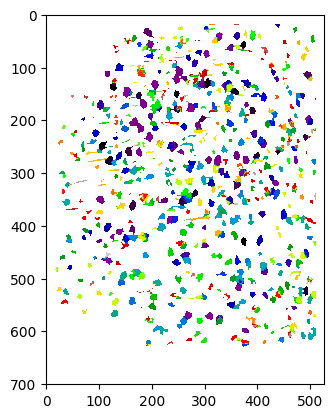

In [5]:
# see ROIs
pix = get_soma_pixel(s2p, color_diff=True)
pix[pix == 0] = np.nan
plt.imshow(pix, cmap='nipy_spectral')
plt.show()